In [145]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [146]:
# load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

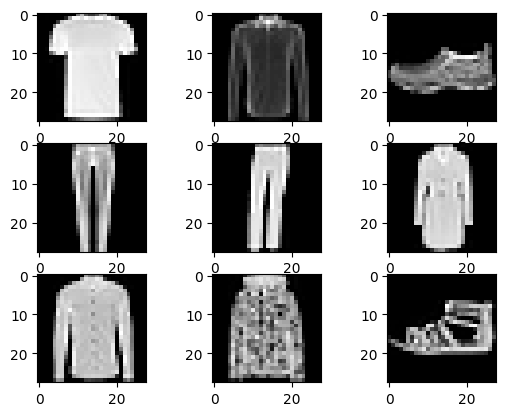

In [147]:
# dataset samples
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[random.randint(0, 60000)], cmap='gray')

In [148]:
# data preproccesing
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train, x_test = x_train/255, x_test/255

In [149]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state=42, test_size=0.3)

In [150]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [151]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [152]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_66 (Dense)            (None, 32)                25120     
                                                                 
 dense_67 (Dense)            (None, 64)                2112      
                                                                 
 dense_68 (Dense)            (None, 128)               8320      
                                                                 
 dense_69 (Dense)            (None, 64)                8256      
                                                                 
 dense_70 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)              

In [153]:
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
1313/1313 [==============================] - 9s 5ms/step - loss: 1.2185 - accuracy: 0.7024 - val_loss: 0.6962 - val_accuracy: 0.8179
Epoch 2/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.7286 - accuracy: 0.7979 - val_loss: 0.6630 - val_accuracy: 0.8066
Epoch 3/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.6401 - accuracy: 0.8192 - val_loss: 0.5564 - val_accuracy: 0.8391
Epoch 4/30
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5887 - accuracy: 0.8330 - val_loss: 0.5176 - val_accuracy: 0.8462
Epoch 5/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5538 - accuracy: 0.8422 - val_loss: 0.4671 - val_accuracy: 0.8658
Epoch 6/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5327 - accuracy: 0.8468 - val_loss: 0.4781 - val_accuracy: 0.8516
Epoch 7/30
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5112 - accuracy: 0.8539 - val_loss: 0.4609 - val_accuracy:

In [154]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4291 - accuracy: 0.8702


[0.4290963411331177, 0.870199978351593]

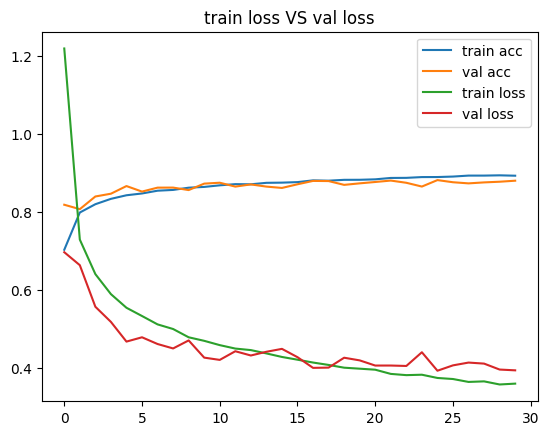

In [155]:
df = pd.DataFrame(hist.history)
plt.plot(df['accuracy'], label='train acc')
plt.plot(df['val_accuracy'], label='val acc')
plt.title('train acc VS val acc')
plt.legend()
plt.plot(df['loss'], label='train loss')
plt.plot(df['val_loss'], label='val loss')
plt.title('train loss VS val loss')
plt.legend()